In [2]:
import pandas as pd
import numpy as np
from math import *
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats
import tools

In [3]:
def boxplot(column1, column2='ces'):
    tmp = df[[column1, column2]].dropna()
    low_q = np.percentile(tmp[column2],25)
    high_q = np.percentile(tmp[column2],75)
    low = tmp[tmp[column2]<low_q]
    high = tmp[tmp[column2]>high_q]
    plt.boxplot([low[column1].dropna(),high[column1].dropna()])
    plt.title('Expression levels of '+str(column1)+' for low and high '+column2+' tumors')
    print('Pvalue of t-test on high and low: ', scipy.stats.ttest_ind(low[column1], high[column1]).pvalue)
    plt.show()

In [10]:
cancers = ['lung_adenocarcinoma','skin','head_neck_SCC','lung_scc' ]
cancer = cancers[1]

In [11]:
df1 = tools.load_aggr('data/'+cancer+'/ces.txt', column='ces')
df2 = tools.load_data('data/'+cancer+'/mmr.txt', cat='mmr')
df3 = tools.load_data('data/'+cancer+'/infl.txt', cat='infl')
df6 = tools.load_data('data/'+cancer+'/cgas.txt', cat='cgas')
df4 = tools.load_mutation('data/'+cancer+'/mutation.txt')
df5 = tools.load_aggr('data/'+cancer+'/infl.txt', column='infl')
df7 = tools.load_aggr('data/'+cancer+'/cgas.txt', column='cgas')
df8 = tools.load_data('data/'+cancer+'/brac.txt',cat='brac')
df9 = tools.load_aggr('data/'+cancer+'/brac.txt',column='brac')

In [12]:
df = df4.merge(df1, how='outer', left_on='Sample ID', right_index=True)
df = df.merge(df2, how='outer', left_on='Sample ID', right_index=True)
df = df.merge(df3, how='outer', left_on='Sample ID', right_index=True)
df = df.merge(df5, how='outer', left_on='Sample ID', right_index=True)
df = df.merge(df6, how='outer', left_on='Sample ID', right_index=True)
df = df.merge(df7, how='outer', left_on='Sample ID', right_index=True)
df = df.merge(df8, how='outer', left_on='Sample ID', right_index=True)
df = df.merge(df9, how='outer', left_on='Sample ID', right_index=True)
df.head()

,Sample ID,Mutation Count,CNA,ces,MLH1_mmr,MLH3_mmr,MSH2_mmr,MSH3_mmr,MSH6_mmr,PCNA_mmr,...,FANCF_brac,MRE11_brac,NLRP2_brac,PALB2_brac,RAD51B_brac,RAD51C_brac,RAD51D_brac,TP53_brac,WRN_brac,brac
0,TCGA-3N-A9WC-06,NaN,0.350241,2968.47,826.257,170.631,806.584,539.175,1115.73,1956.44,...,321.59,476.563,56.208,375.389,61.0258,355.315,178.26,343.27,144.535,11031.2
1,TCGA-3N-A9WD-06,NaN,0.252234,3720.01,567.376,373.759,592.199,290.206,999.291,2922.7,...,492.908,374.468,3.5461,311.348,195.745,219.858,99.305,1140.43,239.716,12049.9
2,TCGA-BF-A1PU-01,73.0,0.682543,4544.35,1467.21,358.442,369.805,316.438,746.429,3877.27,...,249.351,201.948,2.5974,316.558,77.5974,411.039,324.351,5618.83,200.325,17151.1
3,TCGA-BF-A1PV-01,253.0,0.186543,4006.68,770.771,762.702,1142.86,487.46,1510.76,2852.06,...,534.668,485.356,1.4943,480.873,40.6455,248.655,315.003,2230.13,796.473,15486.3
4,TCGA-BF-A1PX-01,309.0,0.000762,4895.79,1044.84,171.359,641.641,239.659,1376.78,3324.99,...,239.833,214.112,704.553,340.285,72.9927,387.209,204.727,2622.52,125.478,12738.7


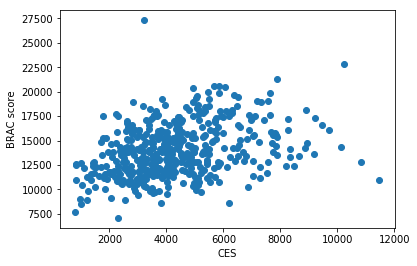

Correlation p value: 


NameError: name 'tmp' is not defined

In [13]:
plt.figure()
plt.scatter(df['ces'],df['brac'])
plt.xlabel('CES')
plt.ylabel('BRAC score')
plt.show()
print('Correlation p value: ')
print(scipy.stats.spearmanr(tmp['ces'], tmp['brac']))

In [14]:
corr_brac = pd.DataFrame([])
for c in df.columns.values:
    if 'brac' in c:
        tmp = df[['ces',c]].dropna()
        correlation, pvalue = scipy.stats.spearmanr(tmp['ces'], tmp[c])
        corr_brac = corr_brac.append(pd.Series([c, correlation,  pvalue]), ignore_index=True)
        if pvalue<0.05:
            print('Correlation with ',c ,' : ',correlation)        
corr_brac.columns=['gene', 'correlation','pvalue']
corr_brac.to_csv('data/'+cancer+'/correlation_brac_with_ces.csv')

Correlation with  ATR_brac  :  0.111100133516
Correlation with  BAP1_brac  :  -0.102040124627
Correlation with  BLM_brac  :  0.662786817635
Correlation with  BRCA1_brac  :  0.499584721684
Correlation with  BRCA2_brac  :  0.485724765081
Correlation with  BRIP1_brac  :  0.510434566676
Correlation with  CHEK1_brac  :  0.556867338492
Correlation with  CHEK2_brac  :  0.52288762456
Correlation with  FANCA_brac  :  0.616220184466
Correlation with  FANCC_brac  :  0.266247721333
Correlation with  FANCD2_brac  :  0.634233038351
Correlation with  FANCE_brac  :  0.18170189476
Correlation with  FANCF_brac  :  0.0949845015257
Correlation with  MRE11_brac  :  0.22212345874
Correlation with  PALB2_brac  :  0.270370719489
Correlation with  RAD51B_brac  :  0.142293933969
Correlation with  RAD51C_brac  :  0.386317703546
Correlation with  TP53_brac  :  -0.202552654985
Correlation with  WRN_brac  :  0.187129499048
Correlation with  brac  :  0.362770544294


In [15]:
df['new_brac'] = np.zeros(len(df))
selected_genes = corr_brac[corr_brac['pvalue']<0.005]['gene']
corr_brac.index=corr_brac['gene']
for g in selected_genes:
    if corr_brac.loc[g]['correlation']<0:
        sign = -1
    else:
        sign = 1
    df['new_brac'] += sign*df[g]

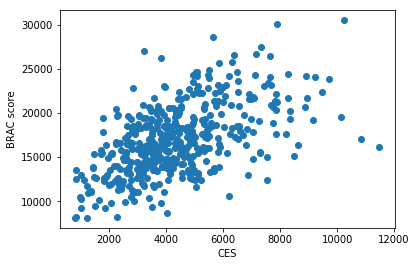

Correlation p value: 
SpearmanrResult(correlation=0.54880507344800145, pvalue=1.7740287290285897e-38)


In [16]:
plt.figure()
plt.scatter(df['ces'],df['new_brac'])
plt.xlabel('CES')
plt.ylabel('BRAC score')
plt.show()
print('Correlation p value: ')
tmp = df[['ces','new_brac']].dropna()
print(scipy.stats.spearmanr(tmp['ces'], tmp['new_brac']))

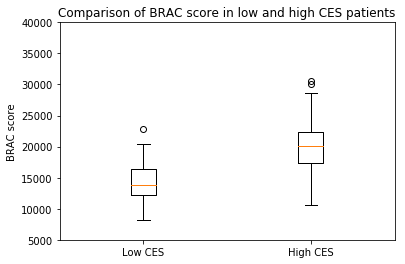

In [17]:
tmp = df[['ces','new_brac']].dropna()
low = np.percentile(tmp['ces'],25)
high = np.percentile(tmp['ces'],75)
l1  = list(tmp[tmp['ces']<low]['new_brac'])
l2  = list(tmp[tmp['ces']>high]['new_brac'])
plt.boxplot([l1,l2],labels=['Low CES','High CES'])
plt.ylabel('BRAC score')
plt.ylim(5000,40000)
plt.title('Comparison of BRAC score in low and high CES patients')
plt.show()


Pvalue of t-test on high and low:  0.194603878627


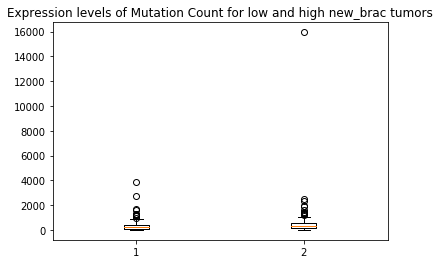

In [18]:
boxplot('Mutation Count','new_brac')

Pvalue of t-test on high and low:  0.0127227944108


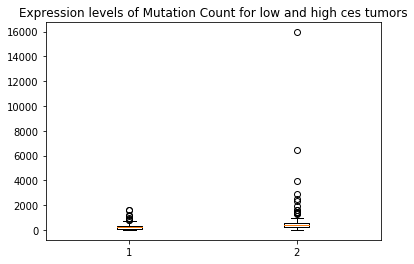

In [19]:
boxplot('Mutation Count','ces')